<a href="https://colab.research.google.com/github/jparkgit/NumPy/blob/master/HW2_Pytorch_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

통계프로그래밍 과제2
# 박지현, 1903055

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## HW 1:

You are given $X$ and $Y$. Using the linear regression, you want to have the following model

$\widehat{Y}=\widehat{\beta}_0+\widehat{\beta}_1X$

by minimizing the following square loss

$g(\beta_0, \beta_1)=\sum\limits_{i=1}^{20}(y_i-(\beta_0+\beta_1 x_i))^2$.

Answer the following questions.

1. Calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ without using autograd.

2. Calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd.

3. Reshape $X$ into the shape of $[20,1]$ and name it as $XX$. Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

4. Stack $X$ and $Y$ to make $MY\_data1$ of shape $[20,2]$. Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

5. Concatenate $X$ and $Y$ to make $MY\_data2$ of shape $[20,2]$. (Use the reshape if necessary) Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

In [3]:
X=torch.tensor([-3.0000e+00, -2.7000e+00, -2.4000e+00, -2.1000e+00, -1.8000e+00,
        -1.5000e+00, -1.2000e+00, -9.0000e-01, -6.0000e-01, -3.0000e-01,
        -2.3842e-08,  3.0000e-01,  6.0000e-01,  9.0000e-01,  1.2000e+00,
         1.5000e+00,  1.8000e+00,  2.1000e+00,  2.4000e+00,  2.7000e+00])

In [4]:
Y = torch.tensor([-7.1452, -5.4253, -5.1977, -3.6225, -3.8022, -4.4101, -4.6622, -3.1932,
        -1.7325, -1.8879, -1.0742, -0.2320,  1.8226,  1.5453, -1.5535,  0.8857,
         1.7537,  3.1607,  1.8912,  4.0895])

1. Calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ without using autograd.


In [45]:
beta = torch.tensor([[1.0], [0.5]], requires_grad=True)
beta0_grad = torch.sum(2*(Y - (beta[0]+beta[1]*X)))*(-1)
beta1_grad = torch.sum(2*(Y - (beta[0]+beta[1]*X))*(-1*X))
grad = torch.tensor([[beta0_grad], [beta1_grad]])
print(grad)

tensor([[  94.5796],
        [-159.6058]])


2. Calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd.

In [84]:
beta = torch.tensor([[1.0], [0.5]], requires_grad=True)
loss = torch.sum((Y - (beta[0]+beta[1]*X))**2)
loss.backward()
print(beta.grad)

tensor([[  94.5796],
        [-159.6058]])


3. Reshape $X$ into the shape of $[20,1]$ and name it as $XX$. Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

In [5]:
X.shape

torch.Size([20])

In [73]:
XX = torch.reshape(X, (20,1))
XX.shape

torch.Size([20, 1])

In [74]:
XX

tensor([[-3.0000e+00],
        [-2.7000e+00],
        [-2.4000e+00],
        [-2.1000e+00],
        [-1.8000e+00],
        [-1.5000e+00],
        [-1.2000e+00],
        [-9.0000e-01],
        [-6.0000e-01],
        [-3.0000e-01],
        [-2.3842e-08],
        [ 3.0000e-01],
        [ 6.0000e-01],
        [ 9.0000e-01],
        [ 1.2000e+00],
        [ 1.5000e+00],
        [ 1.8000e+00],
        [ 2.1000e+00],
        [ 2.4000e+00],
        [ 2.7000e+00]])

In [96]:
beta = torch.tensor([[1.0], [0.5]], requires_grad=True)
loss = torch.sum((Y - (beta[0]+beta[1]*XX))**2)
loss.backward()
print(beta.grad)

tensor([[1891.5918],
        [ 913.2612]])


4. Stack $X$ and $Y$ to make $MY\_data1$ of shape $[20,2]$. Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

In [87]:
MY_data1 = torch.stack([X,Y], axis=1)
MY_data1.shape

torch.Size([20, 2])

In [89]:
MY_data1

tensor([[-3.0000e+00, -7.1452e+00],
        [-2.7000e+00, -5.4253e+00],
        [-2.4000e+00, -5.1977e+00],
        [-2.1000e+00, -3.6225e+00],
        [-1.8000e+00, -3.8022e+00],
        [-1.5000e+00, -4.4101e+00],
        [-1.2000e+00, -4.6622e+00],
        [-9.0000e-01, -3.1932e+00],
        [-6.0000e-01, -1.7325e+00],
        [-3.0000e-01, -1.8879e+00],
        [-2.3842e-08, -1.0742e+00],
        [ 3.0000e-01, -2.3200e-01],
        [ 6.0000e-01,  1.8226e+00],
        [ 9.0000e-01,  1.5453e+00],
        [ 1.2000e+00, -1.5535e+00],
        [ 1.5000e+00,  8.8570e-01],
        [ 1.8000e+00,  1.7537e+00],
        [ 2.1000e+00,  3.1607e+00],
        [ 2.4000e+00,  1.8912e+00],
        [ 2.7000e+00,  4.0895e+00]])

In [91]:
beta = torch.tensor([[1.0], [0.5]], requires_grad=True)
loss = torch.sum((MY_data1[:,1]-(beta[0]+beta[1]*MY_data1[:,0]))**2)
loss.backward()
print(beta.grad)

tensor([[  94.5796],
        [-159.6058]])


5. Concatenate $X$ and $Y$ to make $MY\_data2$ of shape $[20,2]$. (Use the reshape if necessary) Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

In [101]:
YY = torch.reshape(Y, (20,1))

In [102]:
MY_data2 = torch.cat((XX,YY), 1)
print(MY_data2.shape)
MY_data2

torch.Size([20, 2])


tensor([[-3.0000e+00, -7.1452e+00],
        [-2.7000e+00, -5.4253e+00],
        [-2.4000e+00, -5.1977e+00],
        [-2.1000e+00, -3.6225e+00],
        [-1.8000e+00, -3.8022e+00],
        [-1.5000e+00, -4.4101e+00],
        [-1.2000e+00, -4.6622e+00],
        [-9.0000e-01, -3.1932e+00],
        [-6.0000e-01, -1.7325e+00],
        [-3.0000e-01, -1.8879e+00],
        [-2.3842e-08, -1.0742e+00],
        [ 3.0000e-01, -2.3200e-01],
        [ 6.0000e-01,  1.8226e+00],
        [ 9.0000e-01,  1.5453e+00],
        [ 1.2000e+00, -1.5535e+00],
        [ 1.5000e+00,  8.8570e-01],
        [ 1.8000e+00,  1.7537e+00],
        [ 2.1000e+00,  3.1607e+00],
        [ 2.4000e+00,  1.8912e+00],
        [ 2.7000e+00,  4.0895e+00]])

In [103]:
beta = torch.tensor([[1.0], [0.5]], requires_grad=True)
loss = torch.sum((MY_data2[:,1]-(beta[0]+beta[1]*MY_data2[:,0]))**2)
loss.backward()
print(beta.grad)

tensor([[  94.5796],
        [-159.6058]])


## HW 2:

You are given

$f(x)=x^3-3x^2+4$

Answer the following questions.

1. Draw the graph of $(x,f(x))$ for $x\in [-5, 5]$.
2. Draw the graph of $(x,f^{\prime}(x))$ for $x\in [-5, 5]$ using augograd in torch.




Text(0.5, 1.0, 'f(x)')

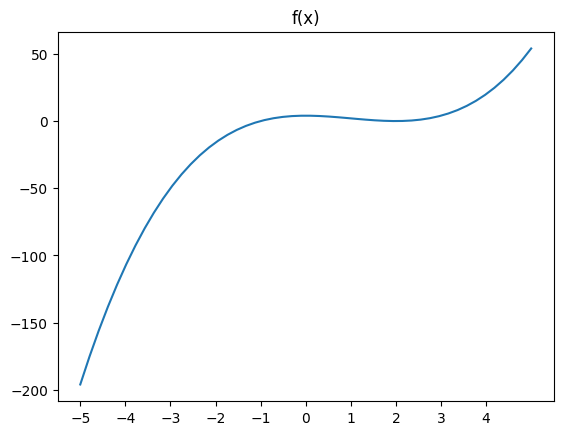

In [61]:
x = torch.linspace(-5,5, 50, requires_grad = True)
f = x**3 - 3*x**2 + 4
plt.plot(x.detach().numpy(), f.detach().numpy())
plt.xticks(np.arange(-5,5,1))
plt.title('f(x)')

Text(0.5, 1.0, "f'(x)")

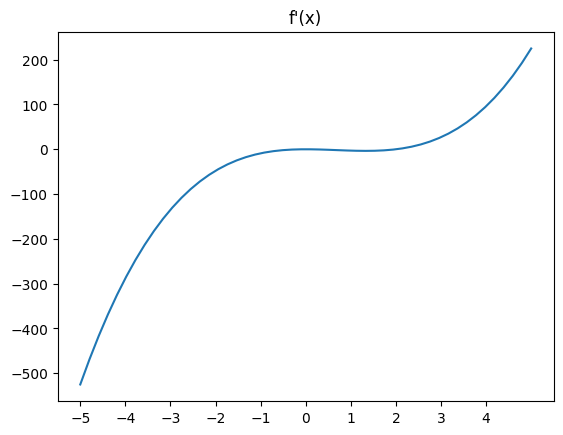

In [60]:
f = x**3 - 3*x**2 + 4
f.backward(x)
plt.plot(x.detach().numpy(), x.grad.detach().numpy())
plt.xticks(np.arange(-5,5,1))
plt.title('f\'(x)')

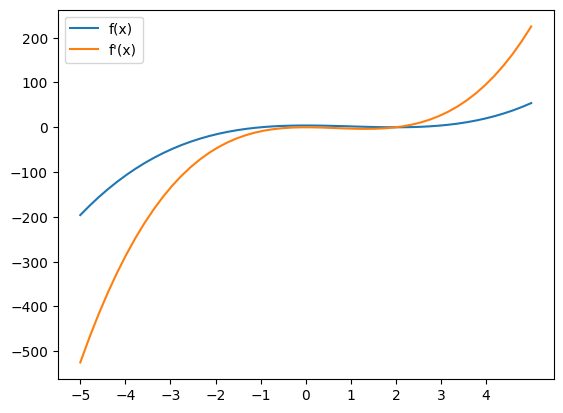

In [64]:
x = torch.linspace(-5, 5, 50, requires_grad=True)
f = x**3 - 3*x**2 + 4
f.backward(x)
plt.plot(x.detach().numpy(), f.detach().numpy(), label='f(x)')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='f\'(x)')
plt.xticks(np.arange(-5,5,1))
plt.legend()